# Libs loading

In [1]:
%reload_ext autoreload
%autoreload 2

In [523]:
import warnings
warnings.filterwarnings('ignore')

import polars as pl
import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier, Pool
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score


import data_squeeze_funcs as dsf
import data_loading_funcs as dlf
import modeling_functions as mf
import feature_engineering as fef
import feat_eng_pol as fepl

# 0. Data loading

In [4]:
# df = dlf.load_data()

In [5]:
# df_grouped = df.groupby("id").agg(lambda x: list(x)).reset_index()

In [6]:

# df_grouped.head(2)

In [7]:
# target = dsf.load_target()

In [8]:
# df_combined = pd.concat([df_grouped, target], axis=1)
# df_combined.shape

In [9]:
# df_combined.head(3)


In [10]:
# df_preped = dsf.column_squeeze(df_combined)
# df_preped.head()


In [16]:
# df = dlf.load_data()
# df.info()

In [17]:
# target = dlf.load_target()
# merged_df = pd.merge(target, df, on='id', how='inner')
# merged_df.info()

In [6]:
# with open('data/total_3M.csv', 'w') as file:
#     merged_df.to_csv(file, index=False)

# 1. Data Preparation

In [37]:
# with open('data/parket_0_df.csv', 'r') as file:
#     df = pd.read_csv(file).iloc[:, 2:]
#     df = df.astype({col: 'float16' for col in df.select_dtypes(include=['float64']).columns})
#     df = df.astype({col: 'int8' for col in df.select_dtypes(include=['int64']).columns})
# df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 60 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   pre_since_opened               250000 non-null  object
 1   pre_since_confirmed            250000 non-null  object
 2   pre_pterm                      250000 non-null  object
 3   pre_fterm                      250000 non-null  object
 4   pre_till_pclose                250000 non-null  object
 5   pre_till_fclose                250000 non-null  object
 6   pre_loans_credit_limit         250000 non-null  object
 7   pre_loans_next_pay_summ        250000 non-null  object
 8   pre_loans_outstanding          250000 non-null  object
 9   pre_loans_total_overdue        250000 non-null  object
 10  pre_loans_max_overdue_sum      250000 non-null  object
 11  pre_loans_credit_cost_rate     250000 non-null  object
 12  pre_loans5                     250000 non-nu

In [38]:
# df_preped = df.copy()
# df_preped.head()

,pre_since_opened,pre_since_confirmed,pre_pterm,pre_fterm,pre_till_pclose,pre_till_fclose,pre_loans_credit_limit,pre_loans_next_pay_summ,pre_loans_outstanding,pre_loans_total_overdue,pre_loans_max_overdue_sum,pre_loans_credit_cost_rate,pre_loans5,pre_loans530,pre_loans3060,pre_loans6090,pre_loans90,is_zero_loans5,is_zero_loans530,is_zero_loans3060,is_zero_loans6090,is_zero_loans90,pre_util,pre_over2limit,pre_maxover2limit,is_zero_util,is_zero_over2limit,is_zero_maxover2limit,enc_paym_0,enc_paym_1,enc_paym_2,enc_paym_3,enc_paym_4,enc_paym_5,enc_paym_6,enc_paym_7,enc_paym_8,enc_paym_9,enc_paym_10,enc_paym_11,enc_paym_12,enc_paym_13,enc_paym_14,enc_paym_15,enc_paym_16,enc_paym_17,enc_paym_18,enc_paym_19,enc_paym_20,enc_paym_21,enc_paym_22,enc_paym_23,enc_paym_24,enc_loans_account_holder_type,enc_loans_credit_status,enc_loans_credit_type,enc_loans_account_cur,pclose_flag,fclose_flag,flag
0,"[18, 18, 18, 4, 5, 5, 3, 2, 1, 7]","[9, 9, 9, 1, 12, 0, 9, 9, 9, 9]","[2, 14, 4, 9, 15, 11, 1, 2, 11, 2]","[3, 14, 8, 12, 2, 8, 2, 3, 13, 10]","[16, 12, 1, 16, 11, 12, 12, 12, 14, 8]","[10, 12, 11, 7, 12, 11, 14, 14, 8, 8]","[11, 0, 11, 12, 10, 4, 15, 15, 2, 16]","[3, 3, 0, 2, 2, 2, 5, 5, 5, 4]","[3, 3, 5, 3, 3, 3, 3, 3, 1, 2]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2]","[11, 11, 8, 4, 4, 4, 3, 13, 11, 11]","[6, 6, 6, 6, 6, 6, 6, 6, 6, 6]","[16, 16, 16, 16, 16, 16, 16, 16, 16, 16]","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5]","[4, 4, 4, 4, 4, 4, 4, 4, 4, 4]","[8, 8, 8, 8, 8, 8, 8, 8, 8, 8]","[1, 1, 1, 0, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[16, 16, 15, 16, 16, 9, 16, 16, 1, 15]","[2, 2, 2, 2, 2, 5, 2, 2, 2, 2]","[17, 17, 17, 17, 17, 4, 17, 17, 17, 17]","[1, 1, 0, 1, 1, 0, 1, 1, 0, 0]","[1, 1, 1, 1, 1, 0, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 0, 1, 1, 1, 1]","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[3, 0, 0, 0, 0, 0, 0, 3, 0, 0]","[3, 0, 0, 0, 0, 0, 0, 3, 0, 0]","[3, 0, 0, 0, 0, 0, 0, 3, 0, 0]","[3, 0, 0, 0, 0, 0, 0, 3, 0, 0]","[3, 0, 0, 0, 0, 0, 0, 3, 0, 3]","[3, 0, 0, 0, 3, 0, 0, 3, 0, 3]","[3, 0, 0, 0, 3, 0, 3, 3, 0, 3]","[3, 0, 0, 0, 3, 0, 3, 3, 0, 3]","[3, 0, 0, 0, 3, 0, 3, 3, 0, 3]","[4, 1, 1, 1, 4, 1, 4, 4, 1, 4]","[3, 0, 0, 3, 3, 0, 3, 3, 0, 3]","[3, 0, 0, 3, 3, 0, 3, 3, 0, 3]","[3, 0, 0, 3, 3, 0, 3, 3, 3, 3]","[3, 0, 0, 3, 3, 0, 3, 3, 3, 3]","[3, 0, 0, 3, 3, 0, 3, 3, 3, 3]","[3, 0, 0, 3, 3, 0, 3, 3, 3, 3]","[3, 0, 0, 3, 3, 0, 3, 3, 3, 3]","[3, 0, 0, 3, 3, 3, 3, 3, 3, 3]","[4, 1, 1, 4, 4, 4, 4, 4, 4, 4]","[3, 0, 0, 3, 3, 3, 3, 3, 3, 3]","[3, 0, 0, 3, 3, 3, 3, 3, 3, 3]","[3, 0, 0, 3, 3, 3, 3, 3, 3, 3]","[4, 4, 4, 4, 4, 4, 4, 4, 4, 4]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[3, 3, 2, 3, 3, 2, 3, 3, 2, 2]","[4, 4, 3, 1, 4, 3, 4, 4, 4, 4]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 1, 0, 0, 1, 0, 0, 0, 0]",0
1,"[8, 8, 15, 15, 14, 14, 14, 10, 10, 13, 18, 2, ...","[7, 7, 7, 3, 4, 14, 3, 14, 14, 6, 8, 5, 9, 6]","[12, 13, 7, 7, 7, 1, 8, 2, 15, 0, 1, 15, 4, 1]","[15, 2, 6, 6, 6, 0, 11, 14, 9, 1, 16, 9, 8, 8]","[9, 9, 9, 9, 9, 13, 6, 13, 13, 14, 15, 7, 1, 14]","[1, 1, 1, 1, 1, 13, 13, 5, 3, 8, 14, 15, 11, 11]","[1, 6, 6, 6, 3, 0, 6, 14, 10, 16, 15, 19, 1, 11]","[2, 2, 2, 2, 2, 2, 2, 0, 2, 4, 5, 2, 1, 2]","[4, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2]","[4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 7, 0, 5]","[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]","[16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 1...","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]","[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]","[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]","[1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1]","[1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1]","[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1]","[2, 0, 16, 16, 16, 16, 16, 16, 16, 3, 16, 16, ..."

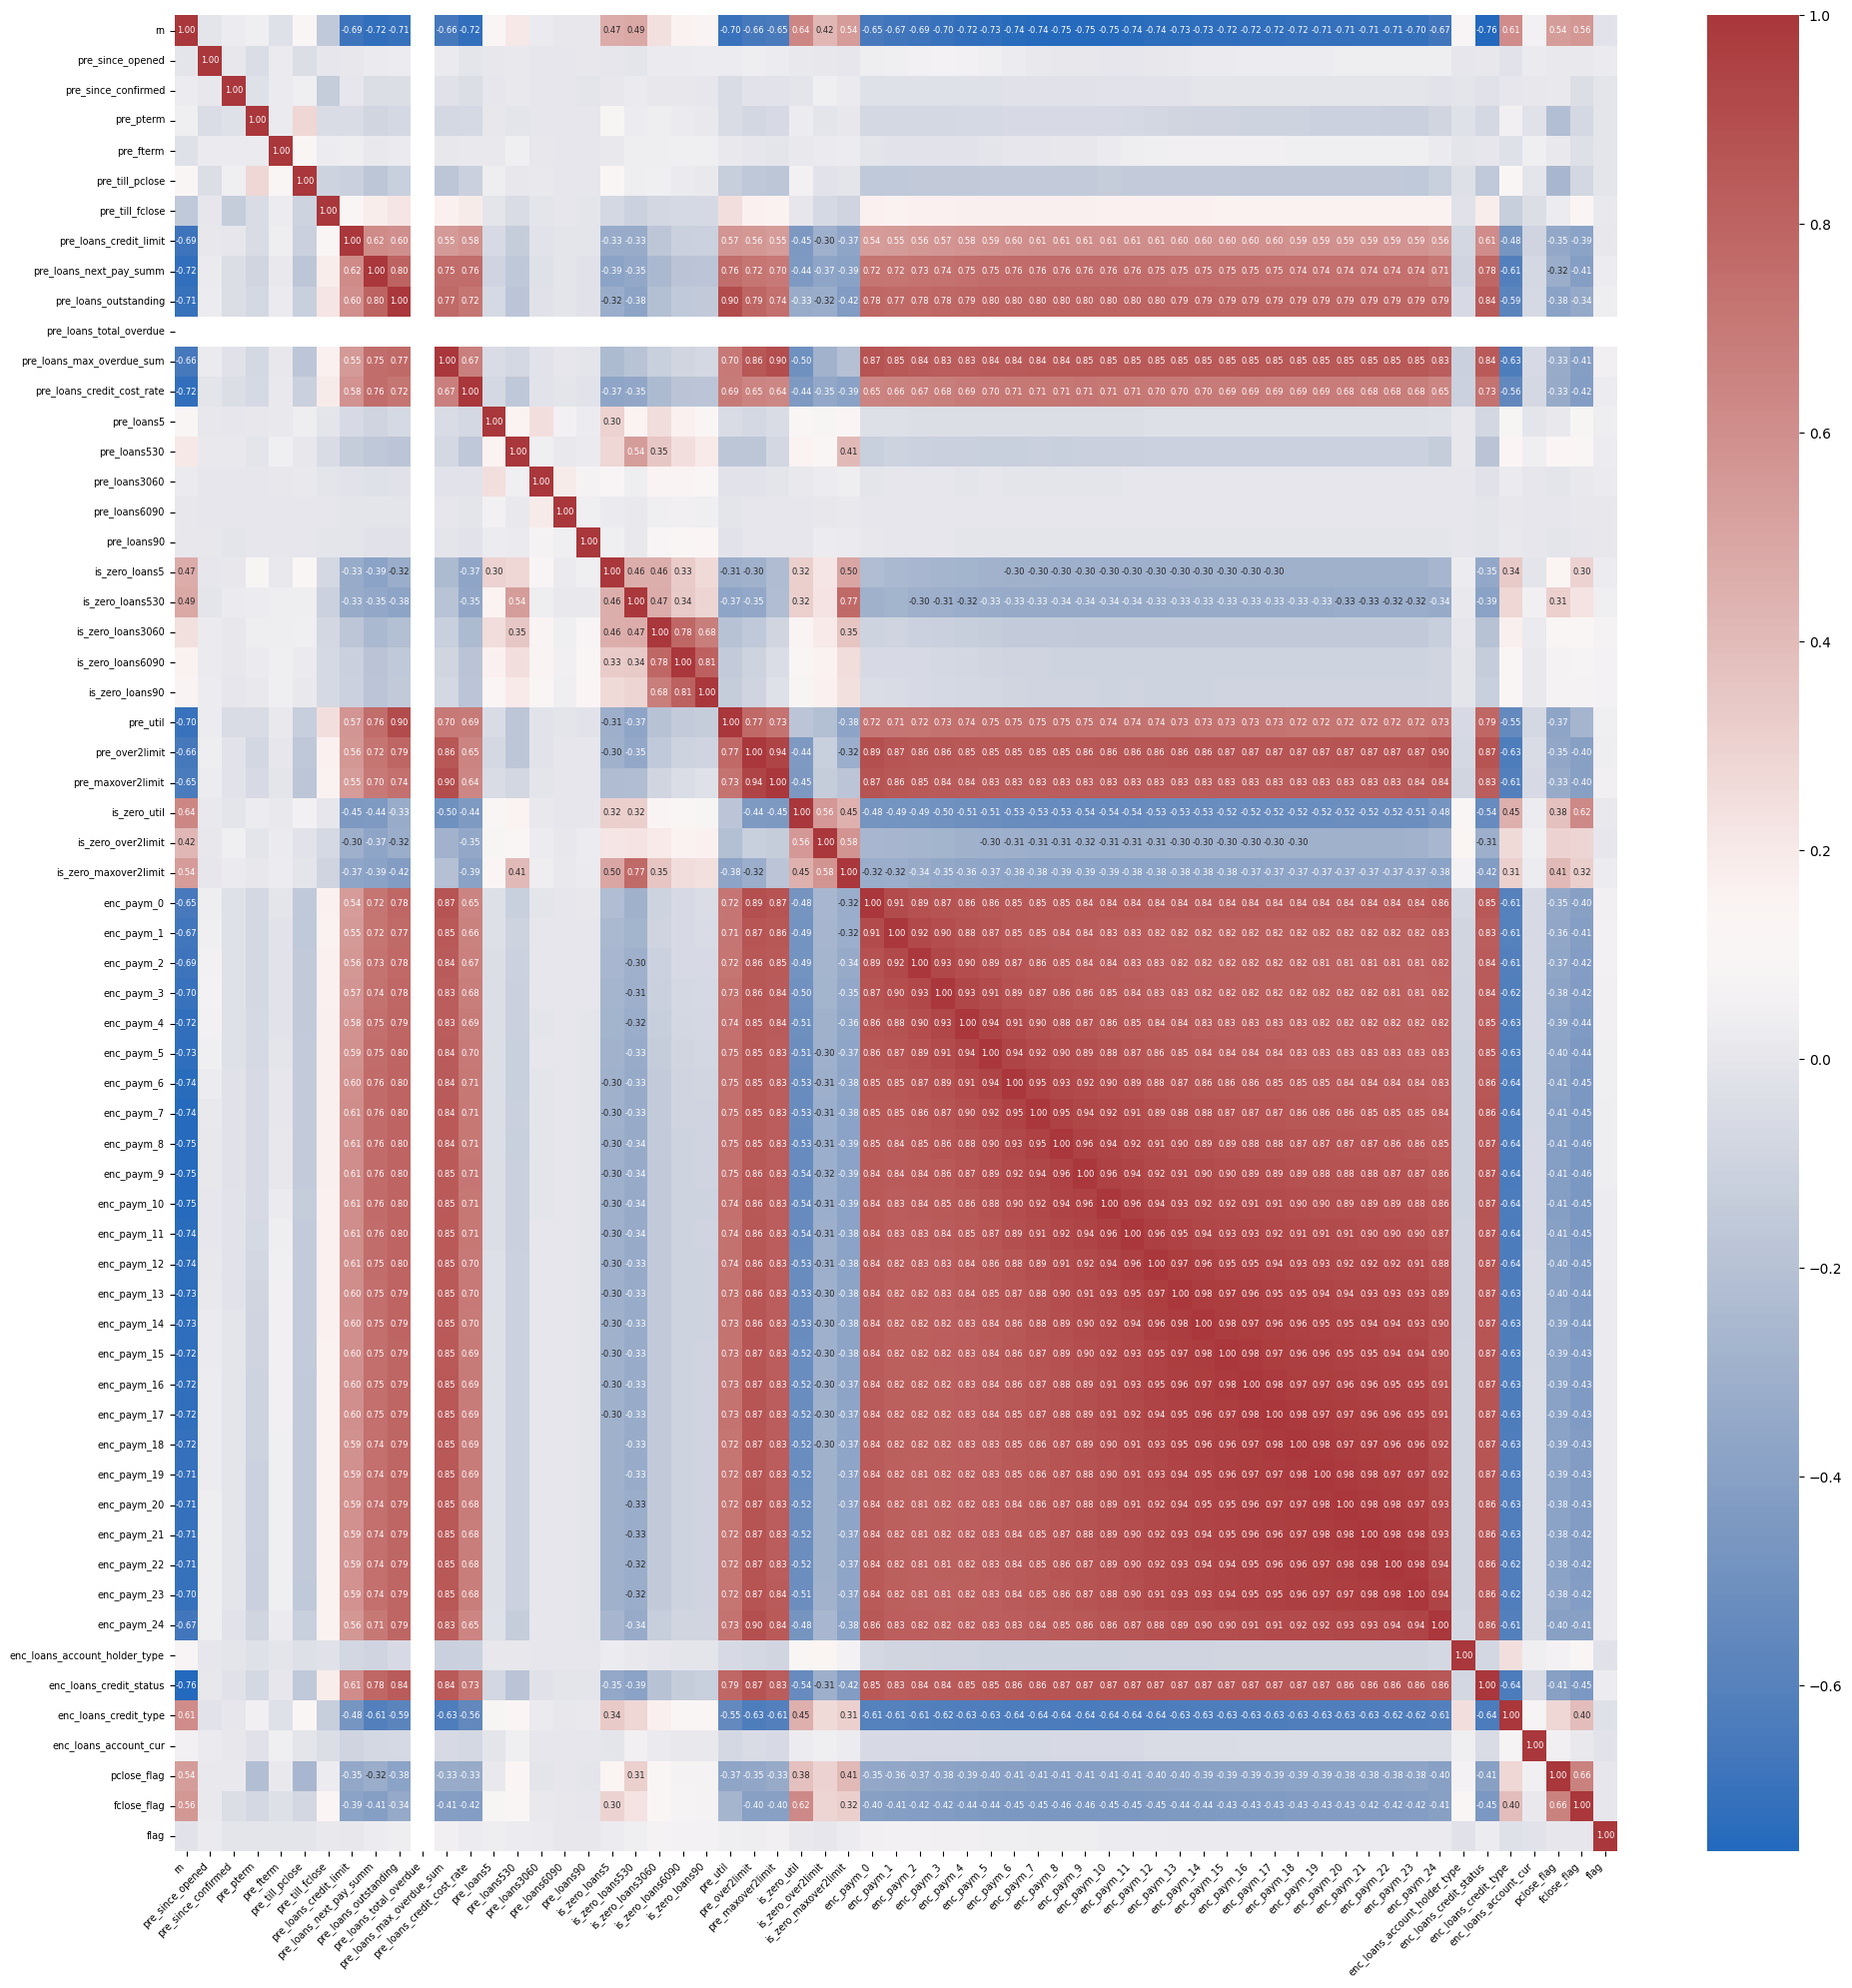

In [327]:
# dsf.show_correlation_heatmap(df_preped)

# 2. Feature Engineering

In [785]:
with open('data/raw_read_3M.csv', 'r', encoding='utf8') as file:
    df_feat = pd.read_csv(file)
    df_feat.id = df_feat.id.astype('int32')
    
#     # cat_feats = [f'enc_paym_{i}' for i in range(25)]
#     # boolean_feats = [i for i in df_feat.columns if df_feat[i].nunique() == 2]

#     # df_feat = df_feat.astype({col: 'category' for col in df_feat[enc_payms]})
#     # df_feat = df_feat.astype({col: 'bool' for col in df_feat[boolean_feats]})
#     # df_feat = df_feat.astype({col: 'category' for col in df_feat.columns if df_feat[col].dtype == 'int8'})

# df_sorted = df_feat.sort_values(by=['id', 'rn'], ascending=[True, False])
# df_filtered = df_sorted.groupby('id').head(3).reset_index(drop=True)

# df_feat = df_filtered.copy()
df_feat = df_feat.astype({col: 'int8' for col in df_feat.select_dtypes(include=['int64']).columns})
# df_feat = df_feat.loc[df_feat['id'] < 50000]
    

df_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26162717 entries, 0 to 26162716
Data columns (total 61 columns):
 #   Column                         Dtype
---  ------                         -----
 0   id                             int32
 1   rn                             int8 
 2   pre_since_opened               int8 
 3   pre_since_confirmed            int8 
 4   pre_pterm                      int8 
 5   pre_fterm                      int8 
 6   pre_till_pclose                int8 
 7   pre_till_fclose                int8 
 8   pre_loans_credit_limit         int8 
 9   pre_loans_next_pay_summ        int8 
 10  pre_loans_outstanding          int8 
 11  pre_loans_total_overdue        int8 
 12  pre_loans_max_overdue_sum      int8 
 13  pre_loans_credit_cost_rate     int8 
 14  pre_loans5                     int8 
 15  pre_loans530                   int8 
 16  pre_loans3060                  int8 
 17  pre_loans6090                  int8 
 18  pre_loans90                    int8 
 19

In [786]:
with open('data/train_target.csv', 'r') as file:
    df_target = pd.read_csv(file)
    df_target.id = df_target.id.astype('int32')
    df_target.flag = df_target.flag.astype('int8')
    # df_target = df_target.iloc[:100000, :]

- Отношение количества дней до закрытия кредита к количеству просроченных платежей
- Сумма просроченных платежей 30-60 и 60-90
- Процент использования кредита при отсутствии просрочек
- Сумма просрочек по каждому типу кредита
- Сумма кодов платежей
- Отношение максимальной просрочки к сроку использования кредита
- Общее количество просрочек
- Просрочки только в открытых кредитах


In [787]:
# df_feat = fef.increase_enc_paym(df_feat)
# df_feat = fef.engineer_features(df_feat)
# df_feat.columns

df_feat["pre_loans_total"] = fef.pre_loans_total(df_feat)
df_feat["pre_loans_upto60"] = fef.pre_loans_upto60(df_feat)
df_feat["pre_loans_over60"] = fef.pre_loans_over60(df_feat)
df_feat["is_zero_loans_total"] = fef.is_zero_loans_total(df_feat)
df_feat["is_zero_loans_upto60"] = fef.is_zero_loans_upto60(df_feat)
df_feat["is_zero_loans_over60"] = fef.is_zero_loans_over60(df_feat)
df_feat["enc_paym_sum"] = fef.enc_paym_sum(df_feat)
df_feat["days_to_close_per_overdue"] = fef.days_to_close_per_overdue(df_feat)
df_feat["util_no_overdue"] = fef.util_no_overdue(df_feat)

In [788]:
cols_enc_paym_sum = [f"enc_paym_{i}" for i in range(25)]

cols_preloans = [
    "pre_loans3060",
    "pre_loans6090",
    "pre_loans90",
    "pre_loans5",
    "pre_loans530",
    "pre_loans_total"
]

cols_is_zero_loans = [
    "is_zero_loans5",
    "is_zero_loans530",
    "is_zero_loans3060",
    "is_zero_loans6090",
    "is_zero_loans90",
    "is_zero_loans_total"
]

df_feat.drop(columns=cols_enc_paym_sum + cols_preloans + cols_is_zero_loans, axis=1, inplace=True)

In [773]:
# df_feat = fef.create_grouped_features(df_feat)

In [774]:
# boolean_feats = [i for i in df_feat.columns if df_feat[i].nunique() == 2]

# df_feat = df_feat.astype({col: 'bool' for col in df_feat[boolean_feats]})
# df_feat = df_feat.astype({col: 'category' for col in df_feat.columns if df_feat[col].dtype == 'int8'})

    
# df_feat.info()

In [775]:
df_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782540 entries, 0 to 782539
Data columns (total 33 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   id                             782540 non-null  int32  
 1   rn                             782540 non-null  int8   
 2   pre_since_opened               782540 non-null  int8   
 3   pre_since_confirmed            782540 non-null  int8   
 4   pre_pterm                      782540 non-null  int8   
 5   pre_fterm                      782540 non-null  int8   
 6   pre_till_pclose                782540 non-null  int8   
 7   pre_till_fclose                782540 non-null  int8   
 8   pre_loans_credit_limit         782540 non-null  int8   
 9   pre_loans_next_pay_summ        782540 non-null  int8   
 10  pre_loans_outstanding          782540 non-null  int8   
 11  pre_loans_total_overdue        782540 non-null  int8   
 12  pre_loans_max_overdue_sum     

In [789]:
df_feat = df_feat.reset_index().rename(columns={'index': 'unique'})
df_feat.unique = df_feat.unique.astype('int32')

In [790]:
# agg_text = 'sum, count_below_mean, percent_unique, count_inside_nth_std, count_outside_nth_std, skew, min_count, n_most_common, num_peaks, count, max, mode, min, num_consecutive_greater_mean, num_unique, n_most_common_frequency, median, variance, max_min_delta, std, average_count_per_unique, count_above_mean, mean, max_consecutive_zeros, median_count, percent_true, max_count'
# trans_text = 'cum_min, exponential_weighted_std, cum_mean, cum_count, divide_by_feature, greater_than_equal_to_scalar, cum_sum, diff, cum_max, greater_than_scalar, multiply_numeric, add_numeric, subtract_numeric_scalar, modulo_by_feature'


# all_trans_primitives = trans_text.split(', ')
# all_agg_primitives = agg_text.split(', ')

# print(all_trans_primitives)
# print(all_agg_primitives)

In [791]:
import featuretools as ft

dataframes = {
    'target': (df_target, 'id'),
    'data': (df_feat, 'unique')
}

relationships = [
    ('target', 'id', 'data', 'id')
]

# trans_primitives = [
    # 'cum_min', 
    # 'cum_mean', 
    # 'cum_count', 
    # 'cum_sum', 
    # 'diff', 
    # 'cum_max', 
    # 'multiply_numeric', 
    # 'add_numeric', 
# ]
agg_primitives = [
    'sum', 
    'count_below_mean', 
    'skew', 
    'min_count', 
    'max', 
    'mode', 
    'min', 
    'median', 
    'variance', 
    'max_min_delta', 
    'std', 
    'mean', 
    'median_count',
]
# trans_primitives = ['negate', 'and', 'or']
# agg_primitives = ['any', 'all', 'percent_true', 'count', 'mode', 'num_unique']

fm, features_defs = ft.dfs(
    dataframes=dataframes,
    relationships=relationships,
    target_dataframe_name="target",
    max_depth=2,
    # trans_primitives=trans_primitives,
    # agg_primitives=agg_primitives,
    ignore_columns={'target': ['flag']},
)

fm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3000000 entries, 0 to 2999999
Columns: 193 entries, COUNT(features) to SUM(features.util_no_overdue)
dtypes: Int64(1), float64(192)
memory usage: 4.3 GB


(3000000, 162)


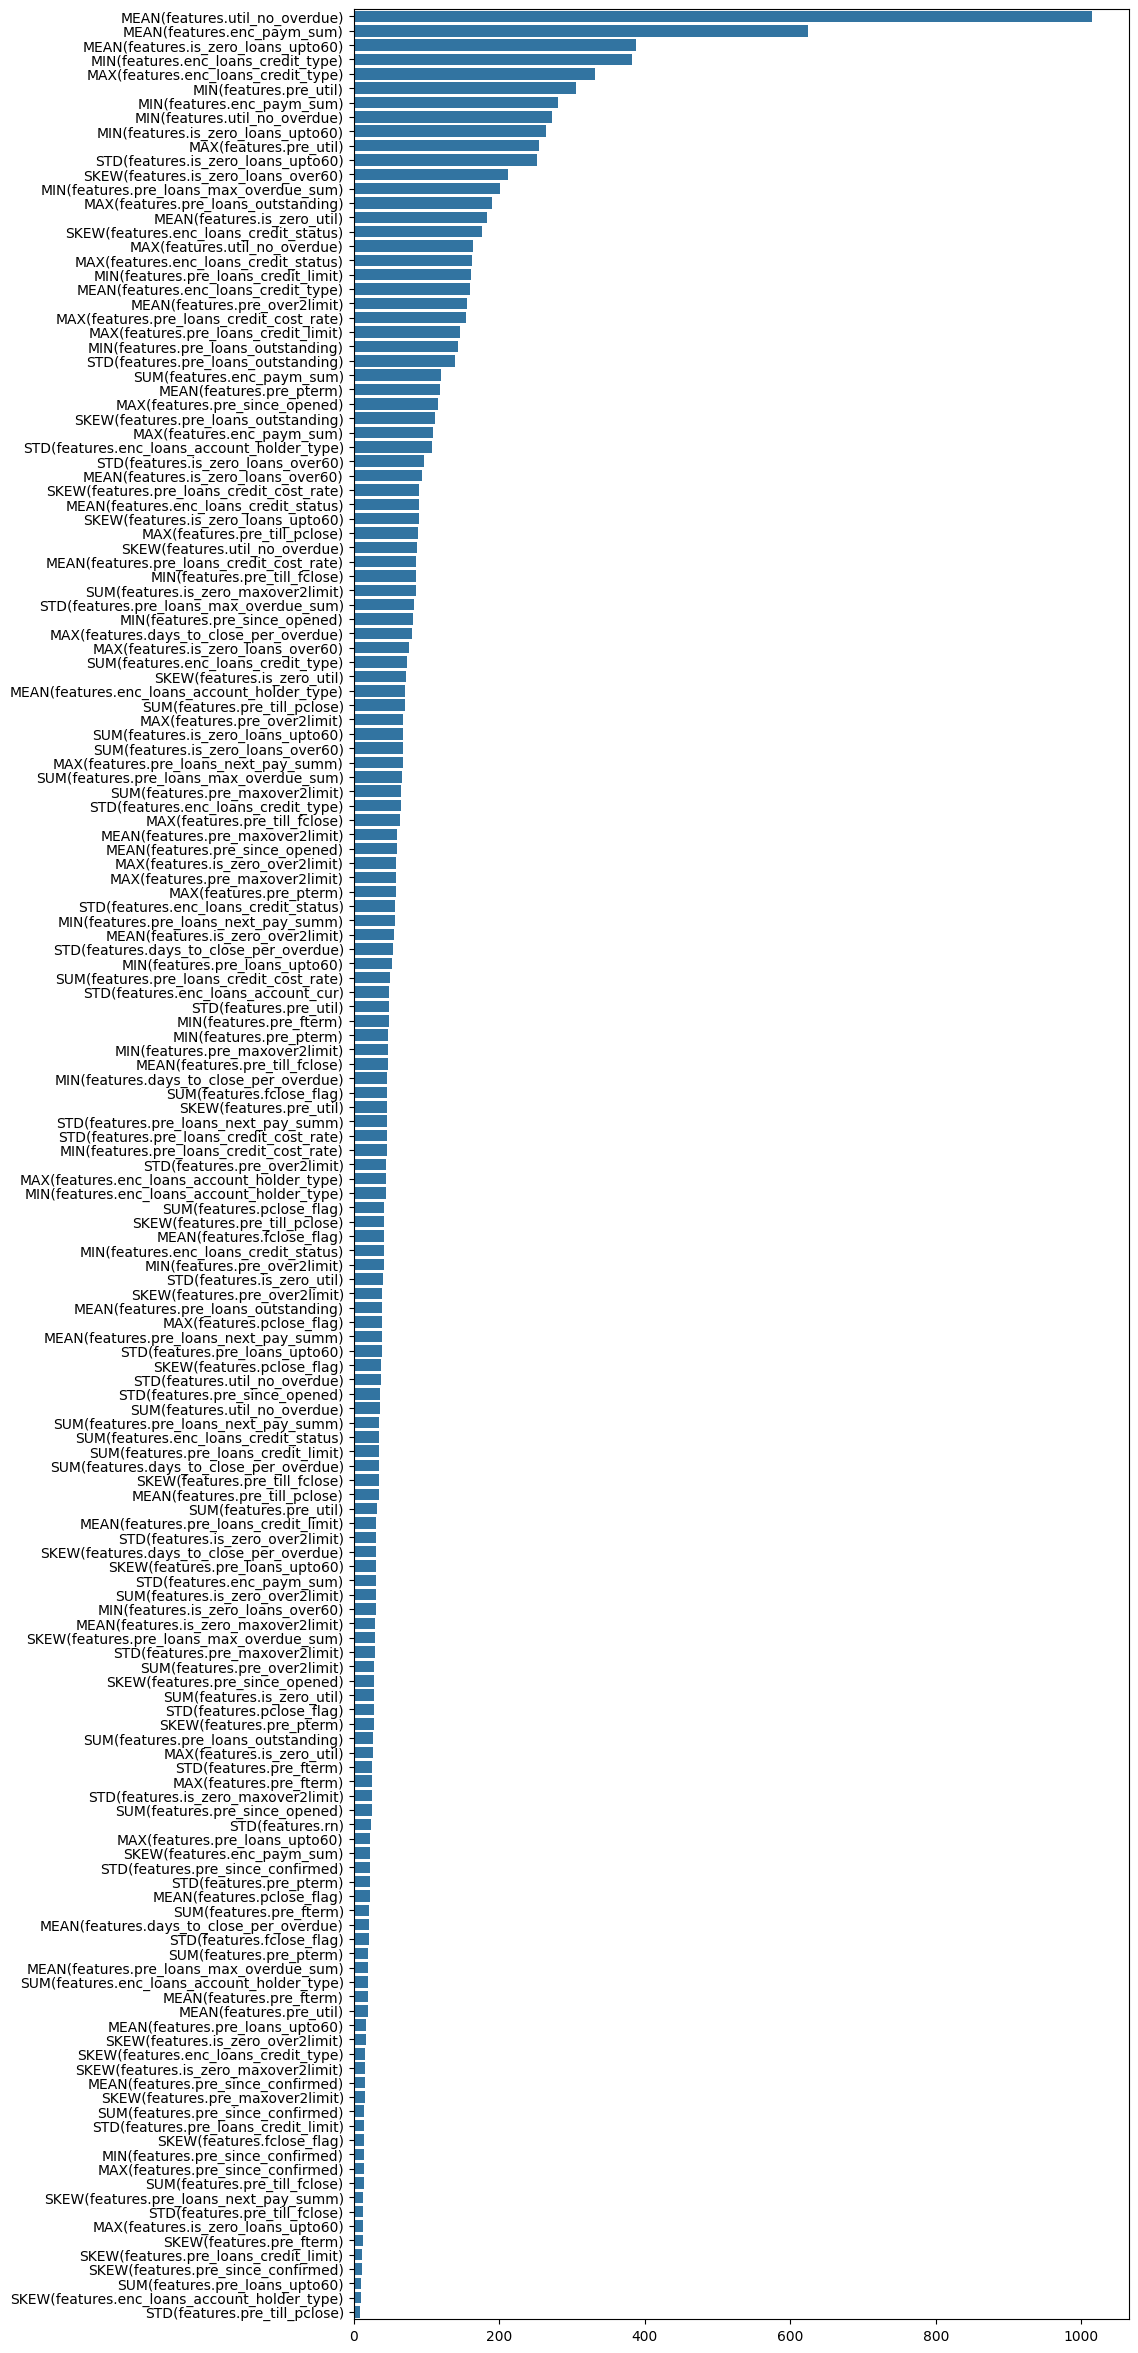

In [792]:
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Данные
X = fm
y = df_target['flag']

# Создание и обучение модели
xgb = XGBClassifier(
    n_estimators=1000,
    max_depth=4,
    learning_rate=0.012,
    random_state=137,
    verbosity=0,
    eval_metric='auc',
    tree_method='gpu_hist',
    enable_categorical=True
)

xgb.fit(X, y)

# Получение важности признаков
feature_importance = xgb.get_booster().get_score(importance_type='gain')

# Сортировка важности признаков
best_features_sorted = dict(
    sorted(feature_importance.items(), key=lambda item: item[1], reverse=True)
)

# Визуализация важности признаков
plt.figure(figsize=(10, 30))
sns.barplot(
    x=list(best_features_sorted.values()), 
    y=list(best_features_sorted.keys())
)

# Фильтрация признаков для нового DataFrame
feats_to_df_model = [feat for feat, val in best_features_sorted.items() if val > .2]
df_squeezed = X[feats_to_df_model].copy()
df_squeezed['flag'] = df_target['flag']

# Размер итогового DataFrame
print(df_squeezed.shape)


In [798]:
feats_to_df_model = [feat for feat, val in best_features_sorted.items() if val > 100]
df_squeezed = X[feats_to_df_model].copy()
df_squeezed['flag'] = df_target['flag']

# Размер итогового DataFrame
print(df_squeezed.shape)


(3000000, 32)


In [793]:
df_squeezed.columns


Index(['MEAN(features.util_no_overdue)', 'MEAN(features.enc_paym_sum)',
       'MEAN(features.is_zero_loans_upto60)',
       'MIN(features.enc_loans_credit_type)',
       'MAX(features.enc_loans_credit_type)', 'MIN(features.pre_util)',
       'MIN(features.enc_paym_sum)', 'MIN(features.util_no_overdue)',
       'MIN(features.is_zero_loans_upto60)', 'MAX(features.pre_util)',
       ...
       'SKEW(features.pre_loans_next_pay_summ)',
       'STD(features.pre_till_fclose)', 'MAX(features.is_zero_loans_upto60)',
       'SKEW(features.pre_fterm)', 'SKEW(features.pre_loans_credit_limit)',
       'SKEW(features.pre_since_confirmed)', 'SUM(features.pre_loans_upto60)',
       'SKEW(features.enc_loans_account_holder_type)',
       'STD(features.pre_till_pclose)', 'flag'],
      dtype='object', length=162)

In [799]:
X = df_squeezed.drop(columns=['flag'])
y = df_squeezed.flag

In [800]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=.2, random_state=137)

In [801]:
# best_params = pd.read_csv('data/best_params.csv', index_col=0).iloc[0].to_dict()

cbc_best = CatBoostClassifier(
    # **best_params,
    iterations=1000,
    learning_rate=0.015,
    random_seed=137,
    max_depth=5,
    cat_features=[i for i in X.columns if X[i].dtype == "category"],
    eval_metric='AUC',
    task_type='GPU',
    logging_level='Silent'
)

# eval_pool = Pool(data=X_test_imp, label=y_test)

cbc_best.fit(X_train, y_train)
y_pred = cbc_best.predict_proba(X_test)[:, 1]

score = roc_auc_score(y_test, y_pred)
print(f'AUC score: {score:.2%}')


Default metric period is 5 because AUC is/are not implemented for GPU


AUC score: 73.62%


In [74]:
df_squeezed.head()

,MEDIAN(features.enc_paym_4),MEAN(features.is_zero_loans3060),MEAN(features.enc_paym_7),SKEW(features.enc_paym_19),MEDIAN(features.enc_loans_credit_type),STD(features.enc_paym_15),MEDIAN(features.enc_paym_7),MEAN(features.enc_loans_credit_status),SUM(features.enc_paym_3),SKEW(features.is_zero_loans90),MIN(features.enc_paym_7),SUM(features.enc_paym_21),MEDIAN(features.enc_paym_3),SUM(features.enc_paym_7),MEAN(features.pclose_flag),SUM(features.enc_paym_12),STD(features.enc_paym_3),SKEW(features.enc_paym_0),MAX_MIN_DELTA(features.pre_loans_outstanding),MEAN(features.enc_paym_9),MEAN(features.enc_paym_1),STD(features.enc_paym_6),SKEW(features.enc_paym_16),MAX_MIN_DELTA(features.enc_paym_1),SUM(features.pre_till_pclose),MEAN(features.enc_paym_5),SKEW(features.enc_paym_15),VARIANCE(features.is_zero_util),SKEW(features.is_zero_loans3060),MEAN(features.enc_paym_3),MAX_MIN_DELTA(features.pre_pterm),MAX(features.enc_loans_credit_status),STD(features.enc_paym_10),MEDIAN(features.enc_paym_5),SUM(features.enc_paym_18),MIN(features.pre_since_opened),MAX(features.enc_paym_7),STD(features.enc_paym_14),MIN(features.pre_loans_credit_cost_rate),STD(features.enc_paym_11),STD(features.enc_paym_0),STD(features.is_zero_loans5),SKEW(features.enc_paym_18),MEAN(features.enc_paym_14),MEDIAN(features.enc_paym_2),SUM(features.is_zero_util),MEAN(features.enc_loans_credit_type),SKEW(features.enc_loans_credit_type),STD(features.enc_paym_4),SUM(features.pre_loans_credit_cost_rate),MEAN(features.is_zero_loans530),MAX(features.pre_till_fclose),MIN(features.enc_paym_6),SKEW(features.pre_loans_credit_limit),MAX_MIN_DELTA(features.enc_paym_9),VARIANCE(features.pre_since_confirmed),VARIANCE(features.pre_util),SKEW(features.enc_paym_17),SUM(features.pclose_flag),SKEW(features.pre_since_confirmed),SUM(features.enc_paym_1),SKEW(features.enc_paym_4),MEAN(features.is_zero_loans6090),SKEW(features.is_zero_loans6090),MEAN(features.is_zero_util),VARIANCE(features.pclose_flag),VARIANCE(features.pre_loans_outstanding),VARIANCE(features.pre_loans_next_pay_summ),MEAN(features.pre_loans_outstanding),SUM(features.enc_paym_10),STD(features.enc_paym_8),MEDIAN(features.pre_pterm),MAX_MIN_DELTA(features.pre_loans_credit_limit),SKEW(features.is_zero_util),VARIANCE(features.pre_pterm),MEAN(features.enc_paym_23),MEAN(features.pre_loans_next_pay_summ),MEDIAN(features.pre_loans_credit_limit),SKEW(features.is_zero_loans5),STD(features.enc_paym_12),MIN(features.pre_maxover2limit),SUM(features.enc_paym_11),SKEW(features.pre_loans_max_overdue_sum),MEAN(features.fclose_flag),MAX_MIN_DELTA(features.pre_till_fclose),SKEW(features.enc_paym_7),MEAN(features.enc_paym_17),VARIANCE(features.is_zero_loans530),STD(features.is_zero_loans3060),SKEW(features.enc_loans_credit_status),SUM(features.pre_till_fclose),MEDIAN(features.pre_since_confirmed),MEAN(features.enc_paym_12),SKEW(features.pre_loans_outstanding),SKEW(features.pre_pterm),STD(features.enc_paym_24),VARIANCE(features.pre_loans_credit_limit),MEAN(features.pre_pterm),STD(features.enc_paym_19),MEAN(features.pre_loans530),MEDIAN(features.pre_till_pclose),MAX(features.pre_util),MAX(features.pre_loans_credit_cost_rate),STD(features.enc_paym_1),SUM(features.enc_paym_9),STD(features.enc_paym_5),STD(features.fclose_flag),SKEW(features.enc_paym_3),VARIANCE(features.pre_loans530),MEAN(features.pre_till_pclose),STD(features.enc_loans_credit_status),SUM(features.enc_paym_2),MEAN(features.is_zero_loans5),MAX(features.pre_since_opened),STD(features.enc_loans_credit_type),SUM(features.pre_loans_credit_limit),SKEW(features.is_zero_maxover2limit),MEAN(features.enc_paym_11),VARIANCE(features.pre_till_fclose),SKEW(features.enc_paym_13),SUM(features.pre_loans_next_pay_summ),SKEW(features.pre_since_opened),MEDIAN(features.pre_maxover2limit),SKEW(features.pre_loans_next_pay_summ),VARIANCE(features.pre_till_pclose),MEAN(features.enc_paym_22),SKEW(features.pre_till_pclose),MEDIAN(features.enc_paym_6),MEAN(features.enc_paym_2),MAX(features.pclose_flag),MAX(features.p

In [158]:
message = "565k features"
mf.get_roc_auc_cb(df_squeezed, message)

Default metric period is 5 because AUC is/are not implemented for GPU


AUC with 565k features                           : 58.32%


('565k features', 0.58323787705231)

- Отношение количества дней до закрытия кредита к количеству просроченных платежей
- Сумма просроченных платежей 30-60 и 60-90
- Процент использования кредита при отсутствии просрочек
- Сумма просрочек по каждому типу кредита
- Сумма кодов платежей
- Отношение максимальной просрочки к сроку использования кредита
- Общее количество просрочек
- Просрочки только в открытых кредитах


In [97]:
# X_selected, selected_features = fef.select_best_features(df_feat)
# # print("Selected features:", selected_features)
# df_to_model = pd.concat([df_feat[selected_features], df_feat['flag']], axis=1) 
# df_to_model.shape 

# 3. Modeling 

In [17]:
df_model = fm.copy()
# df_model = pd.concat([df_feat[selected_features], df_feat['flag']], axis=1)

In [ ]:
message = "565k features"

In [ ]:

# mf.get_roc_auc_xtree(df_model, message)
# mf.get_roc_auc_cb(df_model, message)
# mf.get_roc_auc_xgb(df_model, message)
# fef.playsound()

In [14]:
X = df_model.drop(columns=['flag'])
y = df_model['flag']

# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, random_state=137, stratify=y, test_size=0.2
# )

cbc = CatBoostClassifier(
    iterations=1000,
    max_depth=4,
    learning_rate=.12,
    bagging_temperature=.06,
    random_seed=137,
    logging_level='Silent',
    eval_metric='AUC',
    task_type='GPU',
)

cbc.fit(X, y)

best_features = {
    feat: value for feat, value in zip(X.columns, cbc.get_feature_importance())
}
best_features_sorted = dict(
    sorted(best_features.items(), key=lambda item: item[1], reverse=True)
)
plt.figure(figsize=(10, 30))

sns.barplot(x=best_features_sorted.values(), y=best_features_sorted.keys());

# feature_importances = cbc.get_feature_importance()
# feature_names = X.columns

# importance_df = pd.DataFrame({
#     "Feature": feature_names,
#     "Importance": feature_importances
# }).sort_values(by="Importance", ascending=False)

# Сохраняем топ-100 значимых признаков
# top_features = importance_df.head(100)["Feature"].tolist()

# Оставляем только топовые признаки
# fm_selected = df_model[top_features]

# with open('data/top_features.txt', 'w') as file:
#     file.write(top_features)


NameError: name 'df_model' is not defined

In [163]:
feats_to_df_model = [feat for feat, val in best_features_sorted.items() if val > .5]

df_squeezed = fm[feats_to_df_model]
df_squeezed['flag'] = df_model['flag']
df_squeezed.shape

(100000, 73)

In [164]:
df_squeezed.head()

,MEAN(features.enc_paym_sum),MEAN(features.is_zero_loans_upto60),MIN(features.enc_paym_sum),MIN(features.pre_util),STD(features.is_zero_loans_upto60),MIN(features.util_no_overdue),MEAN(features.util_no_overdue),MEAN(features.enc_loans_credit_type),STD(features.pre_loans_outstanding),MAX(features.util_no_overdue),STD(features.avg_credit_cost_by_type),MAX(features.pre_loans_credit_cost_rate),MIN(features.pre_maxover2limit),STD(features.is_zero_loans_over60),STD(features.min_days_to_close_by_type),STD(features.pre_loans_credit_cost_rate),MAX(features.pre_util),MIN(features.is_zero_loans_upto60),MEAN(features.is_zero_loans_over60),MEAN(features.pre_fterm),MEAN(features.pre_util),MEAN(features.pre_loans_credit_cost_rate),MEAN(features.pre_loans_outstanding),MEAN(features.pre_pterm),SKEW(features.pre_loans_credit_cost_rate),MEAN(features.pre_loans_upto60),SUM(features.enc_paym_sum),MEAN(features.pre_since_opened),SKEW(features.enc_paym_sum),MEAN(features.pre_maxover2limit),MEAN(features.pre_loans_max_overdue_sum),MAX(features.min_days_to_close_by_type),SKEW(features.enc_loans_credit_status),MEAN(features.avg_credit_cost_by_type),STD(features.pre_pterm),STD(features.enc_paym_sum),MIN(features.is_zero_loans_over60),MEAN(features.pre_loans_credit_limit),SKEW(features.pre_since_confirmed),MEAN(features.pre_till_fclose),MAX(features.enc_paym_sum),STD(features.pre_loans_next_pay_summ),STD(features.pre_maxover2limit),SKEW(features.is_zero_loans_upto60),MIN(features.pre_loans_credit_limit),SKEW(features.min_days_to_close_by_type),STD(features.pre_since_confirmed),SKEW(features.pre_till_fclose),STD(features.pre_till_fclose),STD(features.pre_loans_credit_limit),MIN(features.pre_since_opened),SKEW(features.pre_pterm),MIN(features.pre_since_confirmed),SKEW(features.pre_since_opened),SKEW(features.pre_loans_next_pay_summ),MAX(features.avg_credit_cost_by_type),MEAN(features.enc_loans_credit_status),MAX(features.pre_till_fclose),MIN(features.pre_till_fclose),SUM(features.pre_loans_credit_cost_rate),STD(features.pre_over2limit),MAX(features.pre_loans_outstanding),STD(features.pre_since_opened),MEAN(features.pre_since_confirmed),MAX(features.pre_loans_next_pay_summ),MEAN(features.fclose_flag),STD(features.enc_loans_credit_type),MEAN(features.pre_loans_next_pay_summ),SUM(features.pre_fterm),STD(features.days_to_close_per_overdue),SKEW(features.pre_loans_total_overdue),MIN(features.pre_loans_credit_cost_rate),flag
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,67.6875,2.900391,31.0,1.0,0.316162,5.0,66.37500,3.500000,0.994629,80.0,0.181885,13.0,4.0,0.000000,0.000000,3.859375,16.0,2.0,2.000000,7.500000,13.601562,8.000000,2.900391,7.101562,-0.203125,27.000000,677.0,8.101562,-0.448242,15.703125,2.000000,0.0,-0.484131,4.574219,5.464844,24.843750,2.0,9.601562,-1.497070,10.703125,97.0,1.663086,4.109375,-3.162109,0.0,0.000000,3.865234,-0.132324,2.451172,5.679688,1.0,0.248657,0.0,0.824707,-0.376709,4.687500,2.599609,14.0,7.0,80.0,0.948730,5.0,7.031250,7.601562,5.0,0.199951,0.971680,3.099609,75.0,0.051422,0.0,3.0,0
1,69.3125,2.427734,29.0,0.0,0.513672,0.0,54.28125,3.142578,0.474609,80.0,0.204956,7.0,8.0,0.745117,0.000000,1.772461,16.0,2.0,1.642578,7.929688,12.210938,3.714844,2.927734,6.644531,-1.041016,27.000000,970.0,11.429688,-0.729980,15.859375,1.928711,0.0,-1.066406,4.519531,5.402344,24.187500,0.0,8.140625,0.777832,7.000000,103.0,1.166992,2.931641,0.324463,0.0,0.000000,3.855469,0.130005,5.671875,6.113281,2.0,0.358887,3.0,-0.713379,1.036133,4.687500,2.714844,15.0,1.0,52.0,2.244141,4.0,4.183594,7.644531,5.0,0.142822,1.231445,2.142578,111.0,0.045898,0.0,0.0,0
2,74.6875,2.333984,48.0,3.0,1.154297,12.0,35.65625,3.333984,1.000000,80.0,0.189819,5.0,11.0,0.577148,0.000000,1.000000,16.0,1.0,1.666992,6.000000,8.335938,4.000000,3.000000,7.000000,0.000000,22.328125,224.0,8.335938,0.271240,15.000000,1.666992,0.0,1.732422,4.468750,5.195312,27.531250,1.0,1.666992,1.732422,9.000000,103.0,0.577148,3.464844,-1.732422,1.0,0.000000,2.886719,-1.73

In [75]:
X = df_squeezed.drop(columns=['flag'])
y = df_squeezed.flag

In [76]:
from sklearn.impute import KNNImputer

knn_imp = KNNImputer(n_neighbors=5, weights='distance')

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=137, test_size=.2, stratify=y)

X_train_imp = knn_imp.fit_transform(X_train)
X_test_imp = knn_imp.transform(X_test)
X_train_imp = pd.DataFrame(X_train_imp, columns=X_train.columns)
X_test_imp = pd.DataFrame(X_test_imp, columns=X_test.columns)

In [1]:
df_model = df_feat.copy()

X = df_model.drop(columns=['flag'])
y = df_model.flag

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=137, test_size=0.2, stratify=y
)

NameError: name 'df_feat' is not defined

In [77]:
from xgboost import XGBClassifier

xgb_best_params = {
    'n_estimators': 1000,
    'max_depth': 4,
    'learning_rate': 0.01,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    # 'scale_pos_weight': 10,  # Балансировка классов
    'gamma': 1,
    'min_child_weight': 5,
    'reg_alpha': 0.1,
    'reg_lambda': 1,
    'random_state': 137,
    'tree_method': 'gpu_hist',  # Использование GPU
    'objective': 'binary:logistic',
    'eval_metric': 'auc'
}

xgb = XGBClassifier(**xgb_best_params)

xgb.fit(X_train_imp, y_train)

y_pred_xgb = xgb.predict_proba(X_test_imp)[:, 1]
score = roc_auc_score(y_test, y_pred_xgb)
print(f'AUC score: {score:.2%}')
# fef.playsound()

AUC score: 70.03%


In [28]:
# from imblearn.over_sampling import SMOTE, ADASYN
# from imblearn.combine import SMOTEENN


# adasyn = ADASYN(random_state=137)

# X_adasyn, y_adasyn = adasyn.fit_resample(X_train_imp, y_train)

In [29]:
# y_adasyn.shape

(77230,)

In [15]:
best_params_df = pd.read_csv('data/best_params.csv')
best_params = best_params_df.to_dict(orient='records')[0]
best_params

{'iterations': 1431,
 'max_depth': 5,
 'learning_rate': 0.1368350919169864,
 'l2_leaf_reg': 0.0026931913583234,
 'border_count': 136,
 'random_strength': 0.0221644870846657,
 'bagging_temperature': 0.0640718161913472}

In [17]:
cbc_best = CatBoostClassifier(
    **best_params,
    random_seed=137,
    cat_features=[i for i in X.columns if X[i].dtype == "category"],
    eval_metric='AUC',
    task_type='GPU',
    logging_level='Silent'
)

# eval_pool = Pool(data=X_test_imp, label=y_test)

cbc_best.fit(X_adasyn, y_adasyn)
y_pred = cbc_best.predict_proba(X_test_imp)[:, 1]

score = roc_auc_score(y_test, y_pred)
print(f'AUC score: {score:.2%}')
# with open("results.txt", "a") as f:
#     string = f"AUC on CV with the best params{' ':20}: {cv_mean:.2%}"
#     f.write(f"\n{type(cbc).__name__}\n{string}\n")
# fef.playsound()

Default metric period is 5 because AUC is/are not implemented for GPU


AUC score: 64.39%


In [119]:
from sklearn.model_selection import cross_val_score

# X = df_squeezed.drop(columns=['flag'])
# y = df_squeezed.flag


cbc = CatBoostClassifier(
    iterations=1800,
    bagging_temperature=0.064,
    learning_rate=0.012,
    random_seed=137,
    max_depth=4,
    cat_features=[i for i in X_adasyn.columns if X_adasyn[i].dtype == "category"],
    logging_level='Silent',
    eval_metric='AUC',
    task_type='GPU'
)

cv = cross_val_score(cbc, X_adasyn, y_adasyn, cv=5, scoring='roc_auc')
cv_mean = cv.mean()
print(f'CV score: {cv_mean:.2%}')
with open("results.txt", "a") as f:
    string = f"AUC on CV with {message:40}: {cv_mean:.2%}"
    f.write(f"\n{type(cbc).__name__}\n{string}\n")

fef.playsound()

Default metric period is 5 because AUC is/are not implemented for GPU
Default metric period is 5 because AUC is/are not implemented for GPU
Default metric period is 5 because AUC is/are not implemented for GPU
Default metric period is 5 because AUC is/are not implemented for GPU
Default metric period is 5 because AUC is/are not implemented for GPU


CV score: 74.50%


In [174]:
import optuna
from optuna.visualization import plot_optimization_history, plot_param_importances


def objective(trial):
    # X_train, X_test, y_train, y_test = train_test_split(X_adasyn, y_adasyn, test_size=0.2, random_state=137)
    
    params = {
        "cat_features": [i for i in X_adasyn.columns if X_adasyn[i].dtype == 'category'],
        "iterations": trial.suggest_int("iterations", 1000, 2000),
        "max_depth": trial.suggest_int("max_depth", 3, 6),
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.2, log=True),
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1e-3, 10, log=True),
        "border_count": trial.suggest_int("border_count", 32, 255),
        "random_strength": trial.suggest_float("random_strength", 1e-3, 10, log=True),
        "bagging_temperature": trial.suggest_float("bagging_temperature", 0, 5),
        "auto_class_weights": "Balanced",
        "eval_metric": "AUC",
        "logging_level": 'Silent',
        "random_seed": 137,
        "task_type": "GPU",  # Для GPU: "GPU"
    }
    
    # Модель
    model = CatBoostClassifier(**params)
    model.fit(X_adasyn, y_adasyn, eval_set=(X_test_imp, y_test), early_stopping_rounds=50, verbose=0)
    
    # Оценка качества
    y_pred = model.predict_proba(X_test)[:, 1]
    auc_score = roc_auc_score(y_test, y_pred)
    return auc_score

# Запуск Optuna
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)
print('Best score:', study.best_trial.value)

[I 2024-12-20 15:10:53,380] A new study created in memory with name: no-name-4fc0d5c9-bedb-41fb-a828-6ca6d3d06e56
Default metric period is 5 because AUC is/are not implemented for GPU
[I 2024-12-20 15:11:00,179] Trial 0 finished with value: 0.6780867026109173 and parameters: {'iterations': 1317, 'max_depth': 6, 'learning_rate': 0.028076349157812187, 'l2_leaf_reg': 0.009540194773789434, 'border_count': 145, 'random_strength': 0.0019171400943332024, 'bagging_temperature': 2.9966055109068375}. Best is trial 0 with value: 0.6780867026109173.
Default metric period is 5 because AUC is/are not implemented for GPU
[I 2024-12-20 15:11:04,240] Trial 1 finished with value: 0.6531346464270704 and parameters: {'iterations': 1055, 'max_depth': 5, 'learning_rate': 0.00206987968218307, 'l2_leaf_reg': 0.013488787596888275, 'border_count': 78, 'random_strength': 0.037588248982992026, 'bagging_temperature': 0.22567394745759084}. Best is trial 0 with value: 0.6780867026109173.
Default metric period is 5 b

KeyboardInterrupt: 

In [130]:
plot_param_importances(study)

In [127]:
best_params = study.best_params
best_params

{'iterations': 1431,
 'max_depth': 5,
 'learning_rate': 0.13683509191698645,
 'l2_leaf_reg': 0.002693191358323427,
 'border_count': 136,
 'random_strength': 0.022164487084665712,
 'bagging_temperature': 0.06407181619134725}

In [138]:
from catboost import Pool


cbc_best = CatBoostClassifier(
    **best_params,
    random_seed=137,
    cat_features=[i for i in X.columns if X[i].dtype == "category"],
    eval_metric='AUC',
    task_type='GPU',
    logging_level='Silent'
)

eval_pool = Pool(data=X_test_imp, label=y_test)

cbc_best.fit(X_adasyn, y_adasyn)
y_pred = cbc_best.predict_proba(X_test_imp)[:, 1]

score = roc_auc_score(y_test, y_pred)
print(f'AUC score: {score:.2%}')
# with open("results.txt", "a") as f:
#     string = f"AUC on CV with the best params{' ':20}: {cv_mean:.2%}"
#     f.write(f"\n{type(cbc).__name__}\n{string}\n")
# fef.playsound()

Default metric period is 5 because AUC is/are not implemented for GPU


AUC score: 96.44%


In [ ]:
import optuna
from optuna.visualization import plot_optimization_history, plot_param_importances


def objective(trial):
    param_grid = {
        # "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
        "learning_rate": trial.suggest_loguniform("learning_rate", 1e-4, 1.0),
        "n_estimators": trial.suggest_int("n_estimators", 50, 1000),
        "max_depth": trial.suggest_int("max_depth", 1, 20),
        "min_child_weight": trial.suggest_loguniform("min_child_weight", 1e-4, 10.0),
        "gamma": trial.suggest_loguniform("gamma", 1e-4, 10.0),
        "subsample": trial.suggest_uniform("subsample", 0.1, 1.0),
        "colsample_bytree": trial.suggest_uniform("colsample_bytree", 0.1, 1.0),
        # "colsample_bylevel": trial.suggest_uniform("colsample_bylevel", 0.1, 1.0),
        # "colsample_bynode": trial.suggest_uniform("colsample_bynode", 0.1, 1.0),
        "reg_alpha": trial.suggest_loguniform("reg_alpha", 1e-4, 10.0),
        "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-4, 10.0),
        "scale_pos_weight": trial.suggest_loguniform("scale_pos_weight", 1e-4, 100.0),
        "max_delta_step": trial.suggest_int("max_delta_step", 0, 10),
        "tree_method": "gpu_hist",
        # "sampling_method": trial.suggest_categorical("sampling_method", ["uniform", "gradient_based"]),
        # "grow_policy": trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"]),
        "max_bin": trial.suggest_int("max_bin", 2, 512),
    }

    # Создание модели
    model = XGBClassifier(**param_grid)
    model.fit(X_train_imp, y_train, eval_set=[(X_test_imp, y_test)], verbose=0)
    
    # Оценка качества
    y_pred = model.predict_proba(X_test_imp)[:, 1]
    auc_score = roc_auc_score(y_test, y_pred)
    return auc_score

# Запуск Optuna
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)
print('Best score:', study.best_trial.value)

[I 2024-12-21 15:49:45,431] A new study created in memory with name: no-name-b2b80e94-0748-45b0-a5c9-716023a8801e
[W 2024-12-21 15:49:47,204] Trial 0 failed with parameters: {'learning_rate': 0.000436862277182363, 'n_estimators': 506, 'max_depth': 20, 'min_child_weight': 4.598478007675973, 'gamma': 0.011714408747816553, 'subsample': 0.7507164294150266, 'colsample_bytree': 0.6341883089832574, 'reg_alpha': 0.10911905038059246, 'reg_lambda': 1.5299710724503335, 'scale_pos_weight': 2.5820758611470827, 'max_delta_step': 5, 'max_bin': 149} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "c:\Users\User\skillbox\HOMEWORKS\HWs\Lib\site-packages\optuna\study\_optimize.py", line 197, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "C:\Users\User\AppData\Local\Temp\ipykernel_3960\3903141037.py", line 29, in objective
    model.fit(X_train_imp, y_train, eval_set=[(X_test_imp, y_test)], verbose=0)
  File "c:\User

KeyboardInterrupt: 

In [ ]:
plot_param_importances(study)

In [674]:
from sklearn.impute import KNNImputer

knn_imp = KNNImputer(n_neighbors=5, weights='uniform')

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=137, test_size=.2, stratify=y)

X_train_imp = knn_imp.fit_transform(X_train)
X_test_imp = knn_imp.transform(X_test)
X_train_imp = pd.DataFrame(X_train_imp, columns=X_train.columns)
X_test_imp = pd.DataFrame(X_test_imp, columns=X_test.columns)

In [802]:
from xgboost import XGBClassifier

xgb_best_params = {
    'n_estimators': 1000,
    'max_depth': 5,
    'learning_rate': 0.01,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    # 'scale_pos_weight': 2,  # Балансировка классов
    'gamma': 3,
    'min_child_weight': 5,
    'reg_alpha': 0.01,
    'reg_lambda': 1,
    'random_state': 137,
    'tree_method': 'gpu_hist',  # Использование GPU
    # 'objective': 'binary:logistic',
    'eval_metric': 'auc',
    
}

xgb = XGBClassifier(**xgb_best_params, enable_categorical=True)

xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict_proba(X_test)[:, 1]
score = roc_auc_score(y_test, y_pred_xgb)
print(f'AUC score: {score:.2%}')
fef.playsound()

AUC score: 73.98%


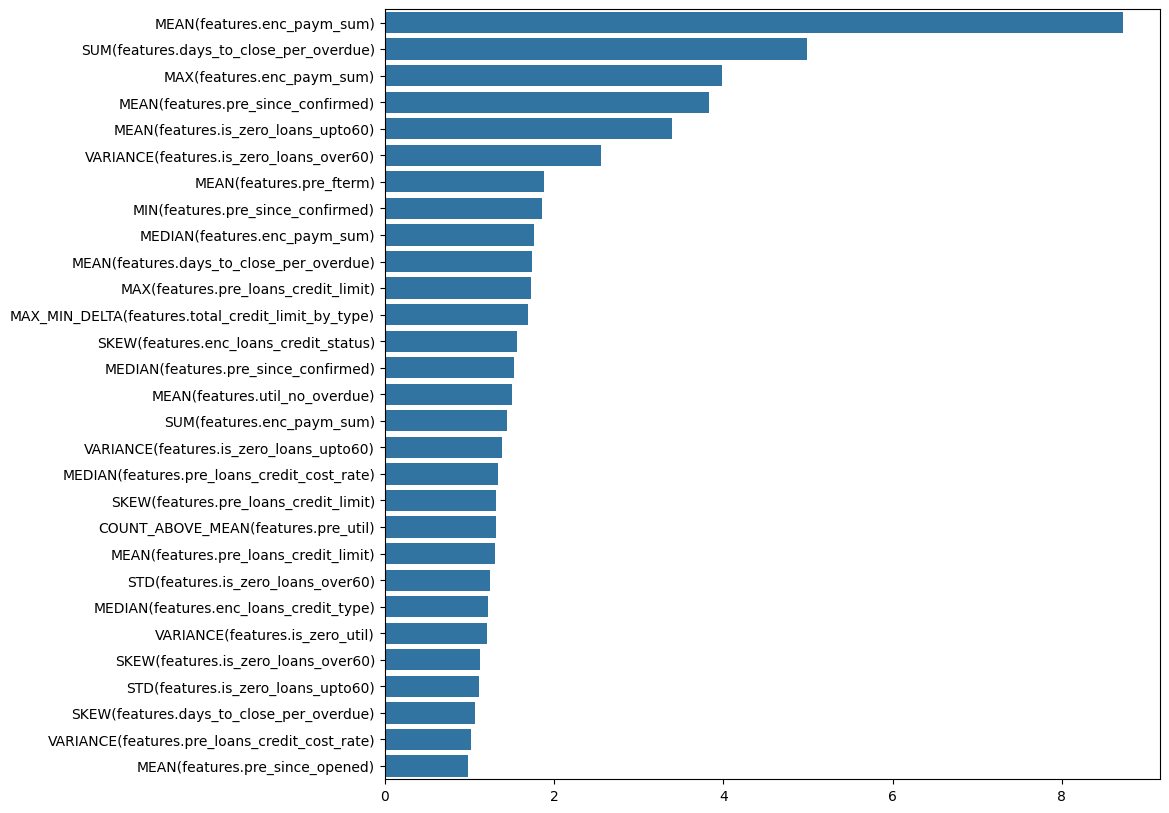

In [ ]:
from itertools import islice
first_20 = dict(islice(best_features_sorted.items(), 29))
plt.figure(figsize=(10, 10))
sns.barplot(x=first_20.values(), y=first_20.keys());